In [1]:
#Load library
import pandas as pd

In [2]:
#import the dataset
data = '/content/Spam_SMS.csv'

In [3]:
#load the dataset in variable name 'df'
df = pd.read_csv(data)

In [4]:
df.head(10)

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


# Check Statistical Info

In [5]:
df.isnull().sum()

,0
Class,0
Message,0


In [6]:
# Display basic information about the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Class    5574 non-null   object
 1   Message  5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [7]:
# Group data by 'Class' and count the number of messages in each class
class_counts = df.groupby('Class')['Message'].count()
print("Class Counts:\n", class_counts)

Class Counts:
 Class
ham     4827
spam     747
Name: Message, dtype: int64


In [8]:
#Calculate the proportion of spam and ham messages
total_messages = len(df)
spam_proportion = class_counts['spam'] / total_messages *100
ham_proportion = class_counts['ham'] / total_messages*100
print("\nSpam Proportion:", spam_proportion)
print("Ham Proportion:", ham_proportion)



Spam Proportion: 13.40150699677072
Ham Proportion: 86.59849300322928


In [9]:
# Explore the length of messages for each class
df['Message_Length'] = df['Message'].apply(len)
df.head()

,Class,Message,Message_Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


- Tokenization: Breaking down the messages into individual words or phrases
- Stop word removal: Removing common words like "the," "a," "is"
- Stemming/lemmatization: Reducing words to their root form
- TF-IDF: Identifying important words in each message
- Sentiment analysis: Determining the emotional tone of the messages

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

df['filtered_message'] = [' '.join([word for word in message.lower().split() if word not in stop_words])
                          for message in df['Message']]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
#create a function to check the frequency of words in 'spam' and 'ham'.
from collections import Counter

def word_count(text):
  return Counter(text.lower().split())

# Analyze the most frequent words in spam and ham messages.

spam_words = df[df['Class'] == 'spam']['filtered_message'].apply(word_count).sum()
ham_words = df[df['Class'] == 'ham']['filtered_message'].apply(word_count).sum()

print("Most frequent words in spam messages:", spam_words.most_common(10))
print("Most frequent words in ham messages:", ham_words.most_common(10))

Most frequent words in spam messages: [('call', 342), ('free', 180), ('2', 169), ('ur', 144), ('txt', 136), ('u', 117), ('text', 112), ('mobile', 109), ('claim', 106), ('reply', 101)]
Most frequent words in ham messages: [('u', 881), ("i'm", 369), ('get', 293), ('2', 288), ('&lt;#&gt;', 276), ('ur', 241), ('go', 238), ('got', 228), ('.', 228), ('like', 223)]


In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

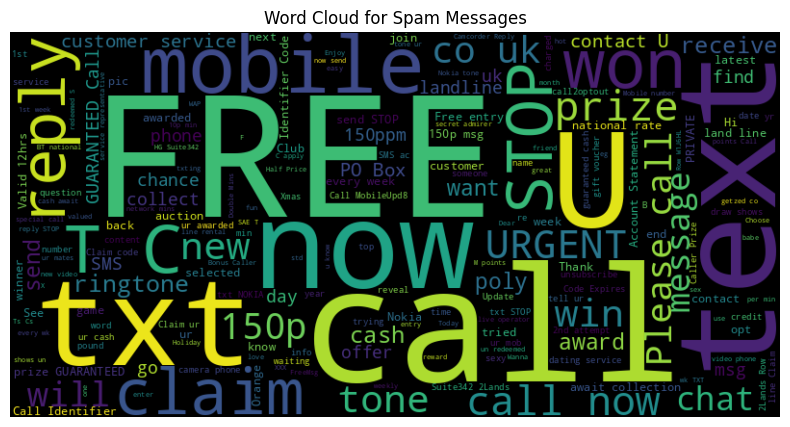

In [13]:
spam_words = ' '.join(df[df['Class'] == 'spam']['Message'].astype(str))
spam_wordcloud = WordCloud(width=800, height=400).generate(spam_words)

plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()

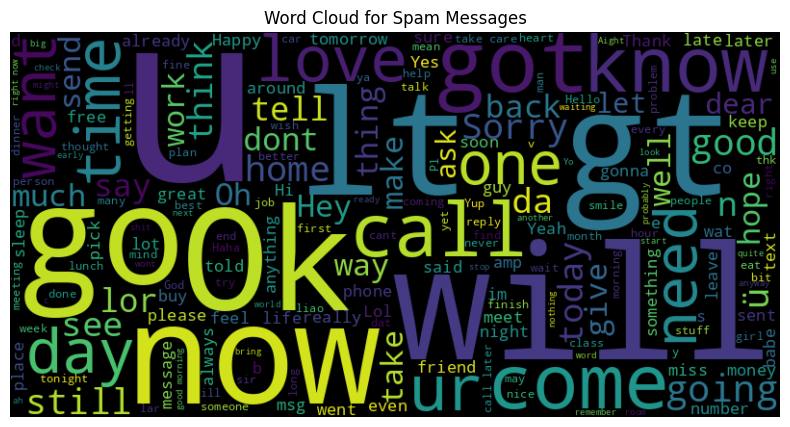

In [15]:
ham_words = ' '.join(df[df['Class'] == 'ham']['Message'].astype(str))
ham_wordcloud = WordCloud(width=800, height=400).generate(ham_words)

plt.figure(figsize=(10, 5))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()

In [20]:
df.head()

,Class,Message,Message_Length,filtered_message,tokenized_message
0,ham,"Go until jurong point, crazy.. Available only ...",111,"go jurong point, crazy.. available bugis n gre...","[Go, until, jurong, point, ,, crazy, .., Avail..."
1,ham,Ok lar... Joking wif u oni...,29,ok lar... joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry 2 wkly comp win fa cup final tkts 2...,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,ham,U dun say so early hor... U c already then say...,49,u dun say early hor... u c already say...,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"nah think goes usf, lives around though","[Nah, I, do, n't, think, he, goes, to, usf, ,,..."


In [19]:
# Tokenization
nltk.download('wordnet')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

df['tokenized_message'] = df['Message'].apply(word_tokenize)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [21]:
# perform stemming and lemmatization.
nltk.download('wordnet')
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Stemming
stemmer = PorterStemmer()
df['stemmed_message'] = df['filtered_message'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

# Lemmatization
lemmatizer = WordNetLemmatizer()
df['lemmatized_message'] = df['filtered_message'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [34]:
df.head()

,Class,Message,Message_Length,filtered_message,tokenized_message,stemmed_message,lemmatized_message
0,ham,"Go until jurong point, crazy.. Available only ...",111,"go jurong point, crazy.. available bugis n gre...","[Go, until, jurong, point, ,, crazy, .., Avail...","[g, o, , j, u, r, o, n, g, , p, o, i, n, t, ...","[g, o, , j, u, r, o, n, g, , p, o, i, n, t, ..."
1,ham,Ok lar... Joking wif u oni...,29,ok lar... joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]","[o, k, , l, a, r, ., ., ., , j, o, k, i, n, ...","[o, k, , l, a, r, ., ., ., , j, o, k, i, n, ..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry 2 wkly comp win fa cup final tkts 2...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[f, r, e, e, , e, n, t, r, y, , 2, , w, k, ...","[f, r, e, e, , e, n, t, r, y, , 2, , w, k, ..."
3,ham,U dun say so early hor... U c already then say...,49,u dun say early hor... u c already say...,"[U, dun, say, so, early, hor, ..., U, c, alrea...","[u, , d, u, n, , s, a, y, , e, a, r, l, y, ...","[u, , d, u, n, , s, a, y, , e, a, r, l, y, ..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"nah think goes usf, lives around though","[Nah, I, do, n't, think, he, goes, to, usf, ,,...","[n, a, h, , t, h, i, n, k, , g, o, e, s, , ...","[n, a, h, , t, h, i, n, k, , g, o, e, s, , ..."


Imagine you have a collection of text messages. TF-IDF helps you identify the words that are most important in distinguishing one message from another. It does this by considering how frequently a word appears in a message (Term Frequency) and how rare it is across all messages (Inverse Document Frequency). The resulting TF-IDF matrix captures this information numerically, allowing machine learning models to understand the text data better.

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['Message'])

# You can access the TF-IDF matrix and analyze it further
# For example, you can use it as input for a machine learning model for spam detection
print(tfidf_matrix)
# You can also explore the vocabulary used by the TF-IDF vectorizer
print(vectorizer.get_feature_names_out())

  (0, 3571)	0.14787938686701288
  (0, 8085)	0.23001892323914586
  (0, 4374)	0.326467645747019
  (0, 5958)	0.25535113536077003
  (0, 2338)	0.2528296765647095
  (0, 1316)	0.2441904570208067
  (0, 5571)	0.15603453765460987
  (0, 4114)	0.10700055412297083
  (0, 1767)	0.2758032215037706
  (0, 3655)	0.1803467768751424
  (0, 8549)	0.22083422107921832
  (0, 4501)	0.2758032215037706
  (0, 1765)	0.31164925159555484
  (0, 2061)	0.2758032215037706
  (0, 7694)	0.15552099304359127
  (0, 3615)	0.15305623970002818
  (0, 1082)	0.326467645747019
  (0, 8325)	0.182416008162686
  (1, 5538)	0.27190435673704183
  (1, 4537)	0.4083285209202484
  (1, 4342)	0.5236769406481622
  (1, 8451)	0.4316309977097208
  (1, 5567)	0.5466195966483365
  (2, 4114)	0.0790778808416933
  (2, 3373)	0.11311495706056472
  :	:
  (5572, 4245)	0.12207880845408346
  (5572, 8372)	0.18730428198312823
  (5572, 1097)	0.11225067656334997
  (5572, 4642)	0.1595487883020045
  (5572, 7089)	0.18433418559699824
  (5572, 3323)	0.12146432831326853
  

In [24]:
# prompt: - Word frequency analysis for each class
# - N-gram analysis to understand common phrases

import pandas as pd
from collections import Counter
from nltk import ngrams

# Load the dataset (assuming it's already loaded as 'df')
# ... (Your existing code to load the dataset) ...

# Function to analyze word frequency and n-grams for each class
def analyze_text(df, class_label):
  messages = df[df['Class'] == class_label]['filtered_message'].tolist()
  all_words = []
  for message in messages:
    words = message.lower().split()
    all_words.extend(words)

  word_counts = Counter(all_words)
  print(f"\nWord Frequencies for {class_label}:\n", word_counts.most_common(10))

  # N-gram analysis (e.g., bi-grams)
  bigrams = list(ngrams(all_words, 2))
  bigram_counts = Counter(bigrams)
  print(f"\nMost Common Bigrams for {class_label}:\n", bigram_counts.most_common(10))


# Perform analysis for each class
analyze_text(df, 'spam')
analyze_text(df, 'ham')


Word Frequencies for spam:
 [('call', 342), ('free', 180), ('2', 169), ('ur', 144), ('txt', 136), ('u', 117), ('text', 112), ('mobile', 109), ('claim', 106), ('reply', 101)]

Most Common Bigrams for spam:
 [(('please', 'call'), 44), (('po', 'box'), 27), (('£1000', 'cash'), 23), (('send', 'stop'), 20), (('prize', 'guaranteed.'), 19), (('guaranteed.', 'call'), 19), (('customer', 'service'), 17), (('valid', '12hrs'), 17), (('2', 'claim'), 17), (('urgent!', 'mobile'), 17)]

Word Frequencies for ham:
 [('u', 881), ("i'm", 369), ('get', 293), ('2', 288), ('&lt;#&gt;', 276), ('ur', 241), ('go', 238), ('got', 228), ('.', 228), ('like', 223)]

Most Common Bigrams for ham:
 [(('.', '.'), 73), (('call', 'later'), 46), (("i'll", 'call'), 44), (('&lt;#&gt;', '.'), 41), (('sorry,', "i'll"), 39), (('u', 'r'), 33), (('r', 'u'), 33), (('let', 'know'), 32), (('wan', '2'), 31), (('u', 'wan'), 23)]


In [ ]:
# Perform further analysis based on the specific goals of your project.
# Examples include:
# - Building a model to classify messages as spam or ham
# - Identifying patterns in the language used in spam messages
# - Analyzing the relationship between message length and spam classification

In [25]:
# prompt: perform sentiment analysis on ''df

#!pip install textblob

from textblob import TextBlob

# Function to perform sentiment analysis
def get_sentiment(text):
  analysis = TextBlob(text)
  return analysis.sentiment.polarity

# Apply sentiment analysis to the 'Message' column
df['sentiment_polarity'] = df['Message'].apply(get_sentiment)

# You can now analyze the sentiment polarity scores
# For example, you can categorize messages based on their sentiment (positive, negative, neutral)
# or analyze the average sentiment for each class (spam or ham)

print(df[['Message', 'sentiment_polarity']].head())

                                             Message  sentiment_polarity
0  Go until jurong point, crazy.. Available only ...                0.15
1                      Ok lar... Joking wif u oni...                0.50
2  Free entry in 2 a wkly comp to win FA Cup fina...                0.30
3  U dun say so early hor... U c already then say...                0.10
4  Nah I don't think he goes to usf, he lives aro...                0.00


In [26]:
#check class wise sentiment distribution.
spam_avg_sentiment = df[df['Class'] == 'spam']['sentiment_polarity'].mean()
ham_avg_sentiment = df[df['Class'] == 'ham']['sentiment_polarity'].mean()

print("Average sentiment for spam messages:", spam_avg_sentiment)
print("Average sentiment for ham messages:", ham_avg_sentiment)

Average sentiment for spam messages: 0.18945814975872707
Average sentiment for ham messages: 0.11647593315528092


In [27]:
df['sentiment_category'] = pd.cut(df['sentiment_polarity'], bins=[-1, -0.1, 0.1, 1], labels=['negative', 'neutral', 'positive'])

In [28]:
df['sentiment_category']

,sentiment_category
0,positive
1,positive
2,positive
3,neutral
4,neutral
...,...
5569,positive
5570,neutral
5571,negative
5572,positive


In [ ]:
df.head(4)

In [29]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

In [30]:
# 1.Building a model to classify messages as spam or ham.
# 2.Identifying patterns in the language used in spam messages.
# 3.Analyzing the relationship between message length and spam classification.

# 1. Building a model to classify messages as spam or ham:

# Assuming your data is in a DataFrame called 'df' with 'Message' and 'Class' columns.

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['Message'], df['Class'], test_size=0.2, random_state=42
)

In [31]:
# Create a TF-IDF vectorizer to convert text into numerical features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [32]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9721973094170404
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       954
        spam       0.99      0.81      0.89       161

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [34]:
# 3. Analyzing the relationship between message length and spam classification:

# Calculate the average message length for spam and ham messages
average_spam_length = df[df['Class'] == 'spam']['Message_Length'].mean()
average_ham_length = df[df['Class'] == 'ham']['Message_Length'].mean()

print(f"Average spam message length: {average_spam_length}")
print(f"Average ham message length: {average_ham_length}")

# You can further analyze this by plotting a histogram or boxplot of message lengths
# for spam and ham messages to visualize the distribution and potential differences.

Average spam message length: 138.63453815261045
Average ham message length: 71.44023202817485
